# Heart Disease Prediction – Exploratory Data Analysis (EDA)

## Objective
The goal of this notebook is to perform Exploratory Data Analysis (EDA) on the
Heart Disease UCI dataset to understand:
- Data distribution
- Feature relationships
- Class balance
- Potential preprocessing requirements

This analysis supports informed model selection and feature engineering
decisions as part of an end-to-end MLOps pipeline.

In [1]:
# Import core data analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style for consistency
sns.axes_style(style="whitegrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [2]:
# Load the heart disease dataset from the data directory
data_path = "../data/heart.csv"
df = pd.read_csv(data_path)

# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Dataset Overview

This dataset contains patient health indicators such as:
- Age
- Sex
- Chest pain type
- Blood pressure
- Cholesterol levels

The target variable `target` indicates:
- `1` → Presence of heart disease
- `0` → Absence of heart disease

In [3]:
# Dataset dimensions
print("Dataset Shape:", df.shape)

# Data types and missing values
df.info()

Dataset Shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Quality Check

We inspect the dataset for:
- Missing values
- Inconsistent data types
- Potential preprocessing needs

In [4]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Target Variable Distribution

Understanding class balance is critical for:
- Model evaluation
- Metric selection
- Bias detection


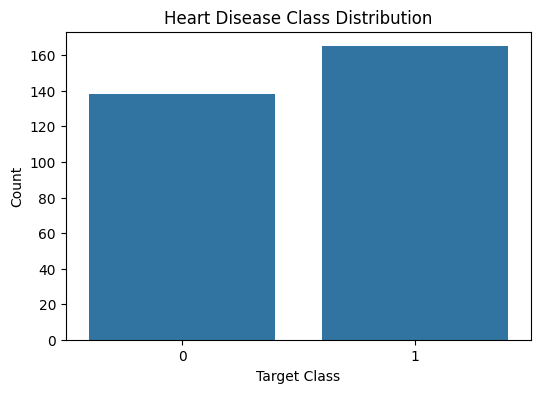

In [5]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Heart Disease Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

## Distribution of Numerical Features

Histograms help understand:
- Feature spread
- Skewness
- Outliers

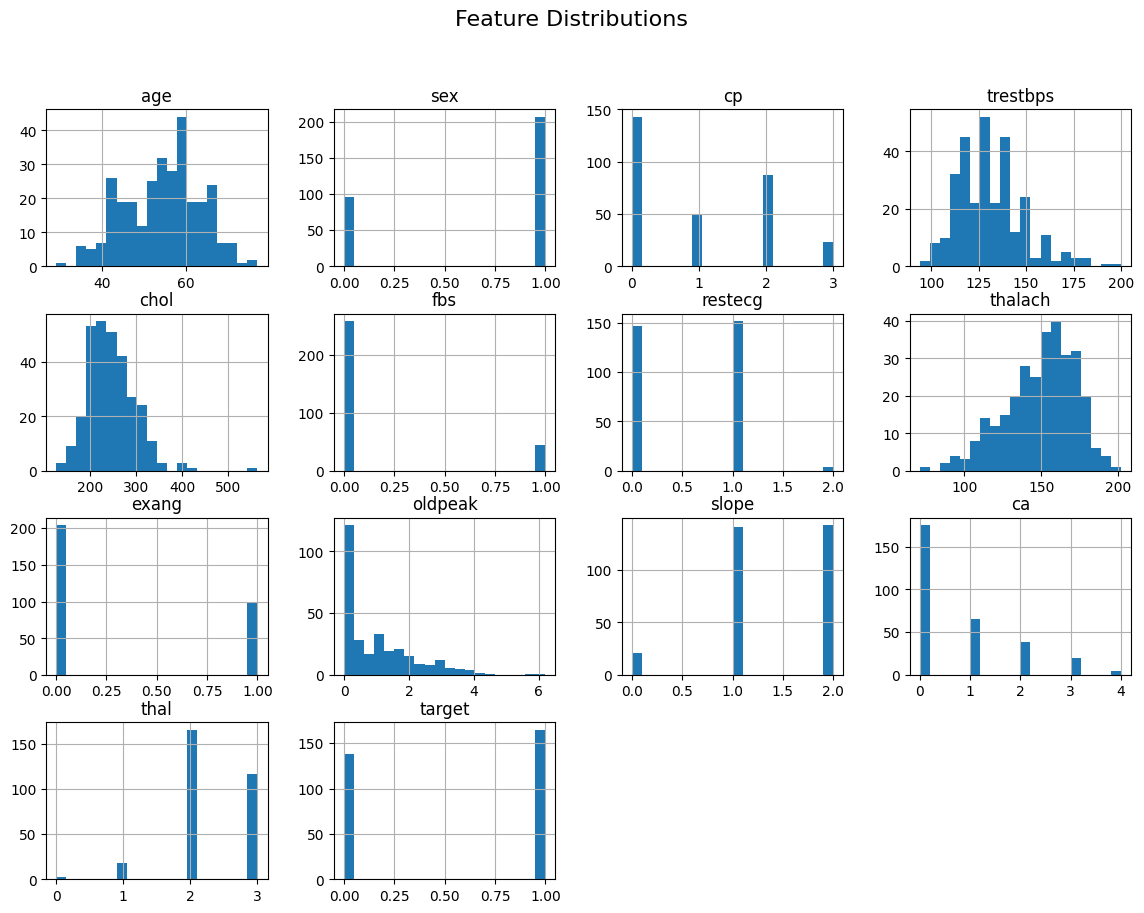

In [6]:
# Plot histograms for numerical features
df.hist(figsize=(14,10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

## Correlation Analysis

Correlation analysis helps identify:
- Strongly related features
- Redundant variables
- Potential multicollinearity

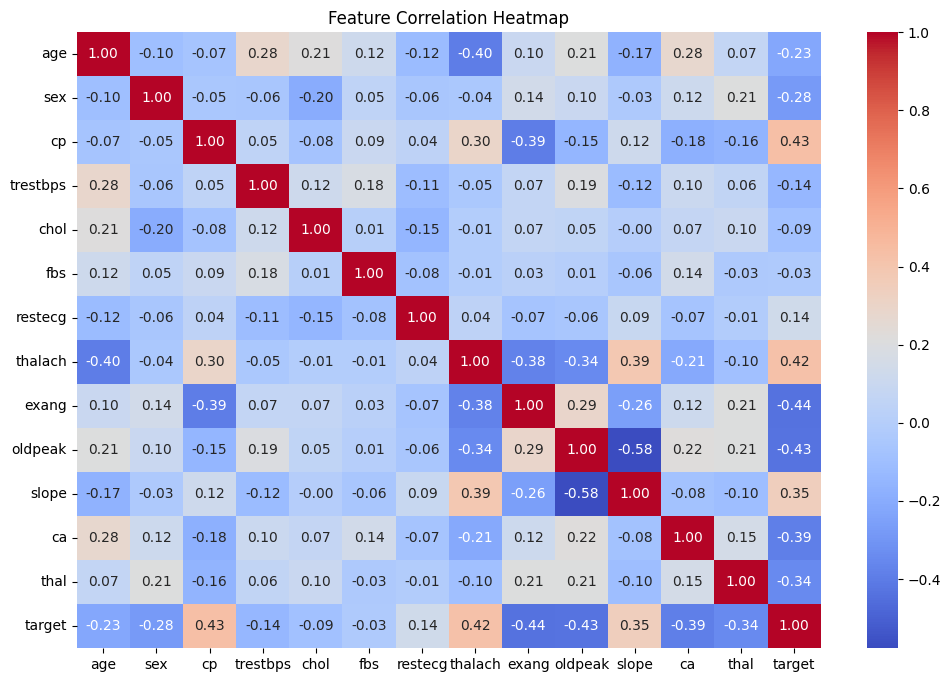

In [7]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Key EDA Insights

- The dataset is clean with no missing values.
- The target variable shows moderate class balance.
- Certain features (age, cholesterol, chest pain type) show
  noticeable correlation with heart disease.
- Feature scaling is required due to varying feature ranges.

These insights guide preprocessing, model selection,
and evaluation strategies in later stages of the MLOps pipeline.